In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Ice_cream selling data.csv')
dataset.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


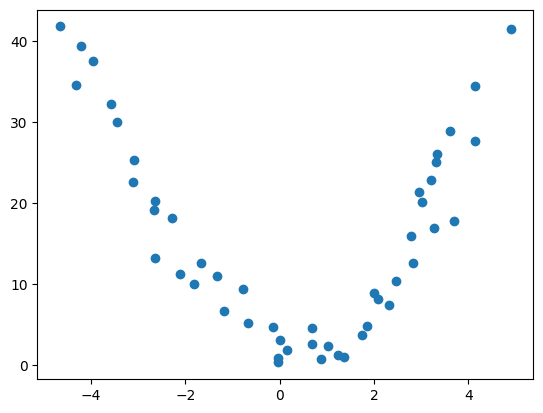

In [3]:
plt.scatter(dataset['Temperature (°C)'], dataset['Ice Cream Sales (units)'])
plt.show()

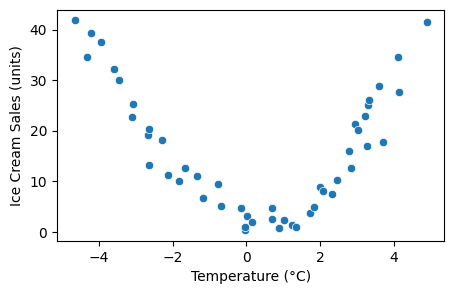

In [4]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Temperature (°C)', y = 'Ice Cream Sales (units)', data = dataset)
plt.show()

In [5]:
dataset.corr() # bad correlation

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In [6]:
x = dataset[['Temperature (°C)']]
y = dataset[['Ice Cream Sales (units)']]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pf = PolynomialFeatures(degree=3) # degree can be changed to improve accuracy
pf.fit(x)
x = pf.transform(x)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
lr.score(x_test, y_test) * 100

84.05107685716915

In [14]:
prd = lr.predict(x)

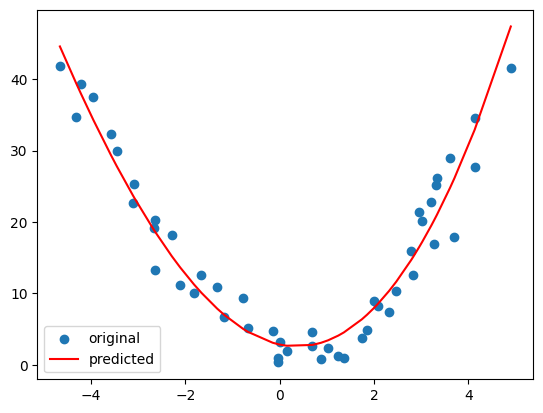

In [18]:
plt.scatter(dataset['Temperature (°C)'], dataset['Ice Cream Sales (units)'])
plt.plot(dataset['Temperature (°C)'], prd, c = 'red')
plt.legend(['original', 'predicted'])
plt.show()

In [19]:
# formula = y = m1.x1 + m2.x2^2 + m3.x3^3 + c
# where, m = coef, c = intercept